In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv('E:\CustomerChurnProject\data\Telco-Customer-Churn.csv')
print("Initial Shape:", df.shape)
df.head()

Initial Shape: (7043, 21)


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Admin\AppData\Local\Temp\ipykernel_7544\4288672434.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('E:\CustomerChurnProject\data\Telco-Customer-Churn.csv')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Churn
No     5174
Yes    1869
Name: count, dtype: int64


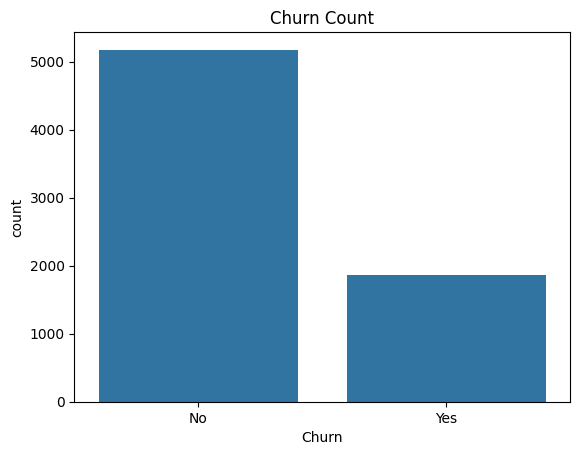

In [4]:
# 🔍 3. Exploratory Data Analysis
print(df['Churn'].value_counts())
sns.countplot(data=df, x='Churn')
plt.title('Churn Count')
plt.show()

In [5]:
# 🧹 4. Data Cleaning
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert categorical to dummy variables
df = pd.get_dummies(df, drop_first=True)

# 💾 Optional: Save cleaned data
# df.to_csv('../data/cleaned_churn.csv', index=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_7544\4189290273.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [6]:
# 🧪 5. Split Data
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [7]:
# 🔄 6. Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# ⚙️ 7. Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

📊 Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC AUC: 0.8415846443979436


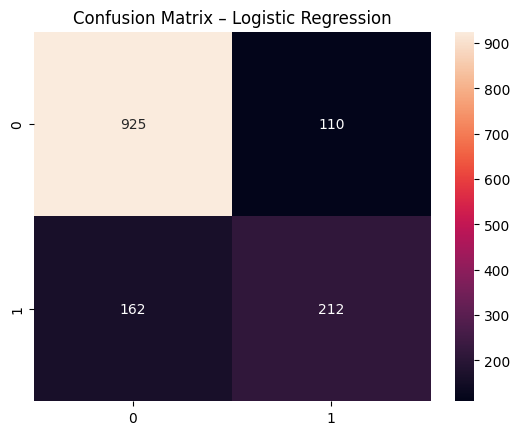

In [9]:
# 📈 8. Evaluation – Logistic Regression
print("📊 Logistic Regression:")
print(classification_report(y_test, log_preds))
print("ROC AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

# 🔍 Confusion Matrix
sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt='d')
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

In [10]:
# ⚙️ 9. Support Vector Machine (SVM)
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [11]:
# 📈 10. Evaluation – SVM
print("📊 SVM Model:")
print(classification_report(y_test, svm_preds))
print("ROC AUC:", roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1]))

📊 SVM Model:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC AUC: 0.7960525975871245


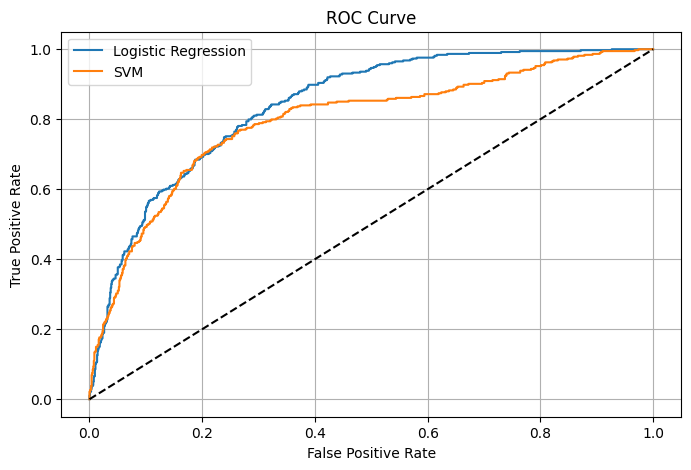

In [12]:
# 🧪 11. ROC Curve Comparison
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])

plt.figure(figsize=(8,5))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()